In [1]:
import os 
import sys
import math
import numpy as np
import matplotlib.pyplot as plt
import cdms
from rawio.IO import *
import pandas as pd
import qetpy as qp
from array import array

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 80 from C header, got 96 from PyObject


In [2]:
### This cell tries to setup a convertion factor, i.e once input is read from raw data in ADC units, convert it to Current (Amps)

'''
for CUTE

fs = 6.25e5 #sample points in per second
Rshunt = 5.0e-3 # shunt resistance on the TES circuit diagram
Rfb = 5000.0 # feedback resistance on the TES circuit diagram
ADCperVolt = 65536.0/8.0 # the number of ADC bins per V for the readout (16 bit digitizer going from -4V to 4V, hence 2^16 divided by 8)
LoopRatio = 2.4 # SQUID turn ratio at CUTE
scale = Rfb*ADCperVolt*LoopRatio

'''


### For UMN 
fs = 1.25e6 #sample points in per second
Rshunt = 8.0e-3 # shunt resistance on the TES circuit diagram
Rfb = 1000 # feedback resistance on the TES circuit diagram
ADCperVolt = 16384./2.5 # the number of ADC bins per V for the readout (14 bit digitizer going from -1.25V to +1.25V, hence 2^14 divided by 2.5)
LoopGain = 10000 # Phonon feeback gain (=10 (input/fb turn ratio) * 1000 Ohm fb resistor)
DG = 20 # driver gain
scale = ADCperVolt*LoopGain

In [3]:
# raw-events path: /data/chocula/fritts/data/k100proc/midasraw/byseries/
#frittsdir='/data/chocula/fritts/data/k100proc/midasraw/byseries/07220420_0842/07220420_0842_F0011.mid.gz'
frittsdir='/data/chocula/fritts/data/k100proc/midasraw/byseries/'
series = '07220420_0842'
events= cdms.rawio.IO.getRawEvents(frittsdir,series,maxNumEvents=1000)

The file is: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220420_0842/07220420_0842_F0001.mid.gz

Opened raw midas file: /data/chocula/fritts/data/k100proc/midasraw/byseries//07220420_0842/07220420_0842_F0001.mid.gz


In [4]:
events.head(2)

Z1  \
                                                                  QI   
72204200842 10000  [40898, 40884, 40861, 40832, 40835, 40906, 408...   
            10001  [40888, 40863, 40912, 40869, 40827, 40788, 408...   

                                                                      \
                                                                  QO   
72204200842 10000  [41603, 41571, 41546, 41531, 41546, 41600, 415...   
            10001  [41533, 41500, 41538, 41487, 41460, 41445, 414...   

                                                                      \
                                                                  PA   
72204200842 10000  [2607, 2606, 2607, 2603, 2603, 2605, 2604, 260...   
            10001  [2854, 2850, 2853, 2852, 2853, 2851, 2852, 285...   

                                                                      \
                                                                  PB   
72204200842 10000  [3065, 3066, 3066, 3061, 3077, 3076, 3080, 307...   
            10001  [3308, 3309, 3308, 3309, 3307, 3308, 3307, 330...   

                                                                      \
                                                                  PC   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  PD   
72204200842 10000  [2719, 2719, 2719, 2715, 2719, 2719, 2716, 271...   
            10001  [2925, 2926, 2921, 2928, 2928, 2929, 2927, 292...   

                                                                  Z2  \
                                                                  QI   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  QO   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  PA   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  PB   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  PC   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                      \
                                                                  PD   
72204200842 10000  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
            10001  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                                  Z3  \
                                                                  QI   
72204200842 10000  [33634, 33630, 33636, 33642, 33633, 33636, 336...   
            10001  [33613, 33610, 33611, 33614, 33618, 33615, 336...   

                                                                      \
                                                                  QO   
72204200842 10000  [33539, 33536, 33546, 33546, 33541, 33547, 335...   
            10001  [33523, 33524, 33524, 33520, 33522, 33519, 335...   

                    

In [5]:
channels = ['PA','PB','PC','PD','PE','PF']
traces = {}
traces['PA'] = events['Z1']['PA']
traces['PB'] = events['Z1']['PB']
traces['PC'] = events['Z1']['PD']
traces['PD'] = events['Z3']['PA']
traces['PE'] = events['Z3']['PB']
traces['PF'] = events['Z3']['PD']
tracesAmps = {}

# for chan in channels:
    
# temp = []
# for i in tracesAmps['PC'][72204200842,:].values[:]:
#     temp.append(i)    
# traceArray = np.asarray(temp)
# print(traceArray.shape)


for chan in traces.keys():
    temp = []
    conv2Amp = 1./(scale*DG)
    for i in traces[chan][int(series),:].values[:]:
        temp.append(i*conv2Amp)
    tracesAmps[chan] = np.asarray(temp)
    print(chan,' : ',tracesAmps[chan].shape)
#    print('Traces in %s = %d'%(key,len(tracesAmps[key])))

PA  :  (1000, 4096)
PB  :  (1000, 4096)
PC  :  (1000, 4096)
PD  :  (1000, 4096)
PE  :  (1000, 4096)
PF  :  (1000, 4096)


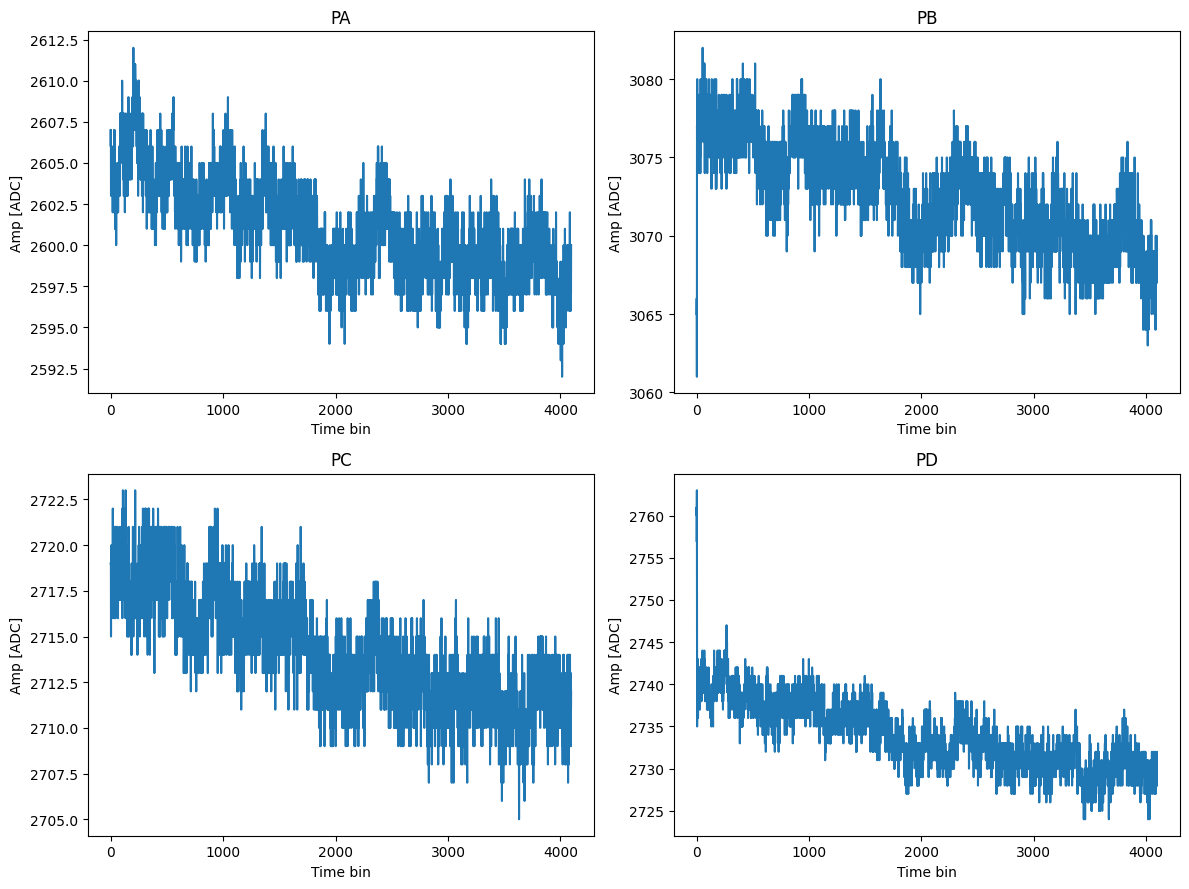

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))
pp=[(0,0), (0,1), (1,0), (1,1)]
eid = 0
#eid = 15000
for i,chan in enumerate(channels):
    if(i > 3):
        break
    trace_median = 0 #np.median(traces[chan].iloc[eid][10:500])
    axs[pp[i]].plot(traces[chan].iloc[eid] - trace_median)
    axs[pp[i]].set_title(chan)
    axs[pp[i]].set_xlabel('Time bin')
    axs[pp[i]].set_ylabel('Amp [ADC]')
fig.tight_layout()

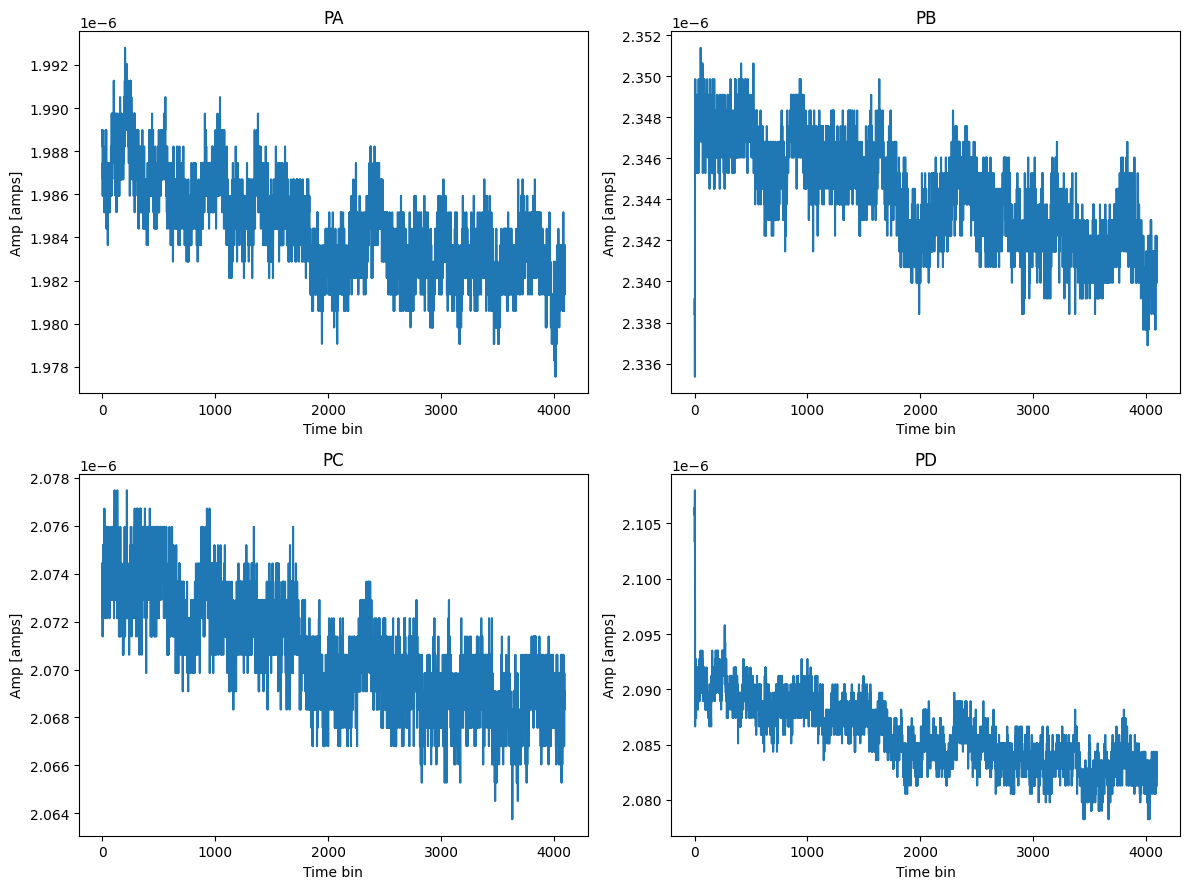

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(12,9))
pp=[(0,0), (0,1), (1,0), (1,1)]
eid = 0
#eid = 15000
for i,chan in enumerate(channels):
    if(i > 3):
        break
    trace_median = 0 #np.median(traces[chan].iloc[eid][10:500])
    traceAmp = traces[chan].iloc[eid]/(scale*DG)
    axs[pp[i]].plot(traceAmp - trace_median)
    axs[pp[i]].set_title(chan)
    axs[pp[i]].set_xlabel('Time bin')
    axs[pp[i]].set_ylabel('Amp [amps]')
fig.tight_layout()

In [8]:
tracesAmps.keys()

dict_keys(['PA', 'PB', 'PC', 'PD', 'PE', 'PF'])

In [11]:
noise_psd_cut = {}
noise_psd_nocut = {}
cut = {}
for i,chan in enumerate(channels):
    cut[chan] = qp.autocuts(tracesAmps[chan], fs)    
    noise_psd_nocut[chan] = qp.calc_psd(tracesAmps[chan], fs=fs, folded_over=True)
    noise_psd_cut[chan] = qp.calc_psd(tracesAmps[chan][cut[chan]], fs=fs, folded_over=True)
    print('%s : Cut efficieny is %0.3f'%(chan, np.sum(cut[chan])/len(tracesAmps[chan])))

PA : Cut efficieny is 0.062
PB : Cut efficieny is 0.112
PC : Cut efficieny is 0.110
PD : Cut efficieny is 0.072
PE : Cut efficieny is 0.091
PF : Cut efficieny is 0.108


<>:14: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_1404271/2907109942.py:14: DeprecationWarning: invalid escape sequence \s
  axs[pp[i]].set_ylabel('Noise PSD [A/$\sqrt{Hz}$]')


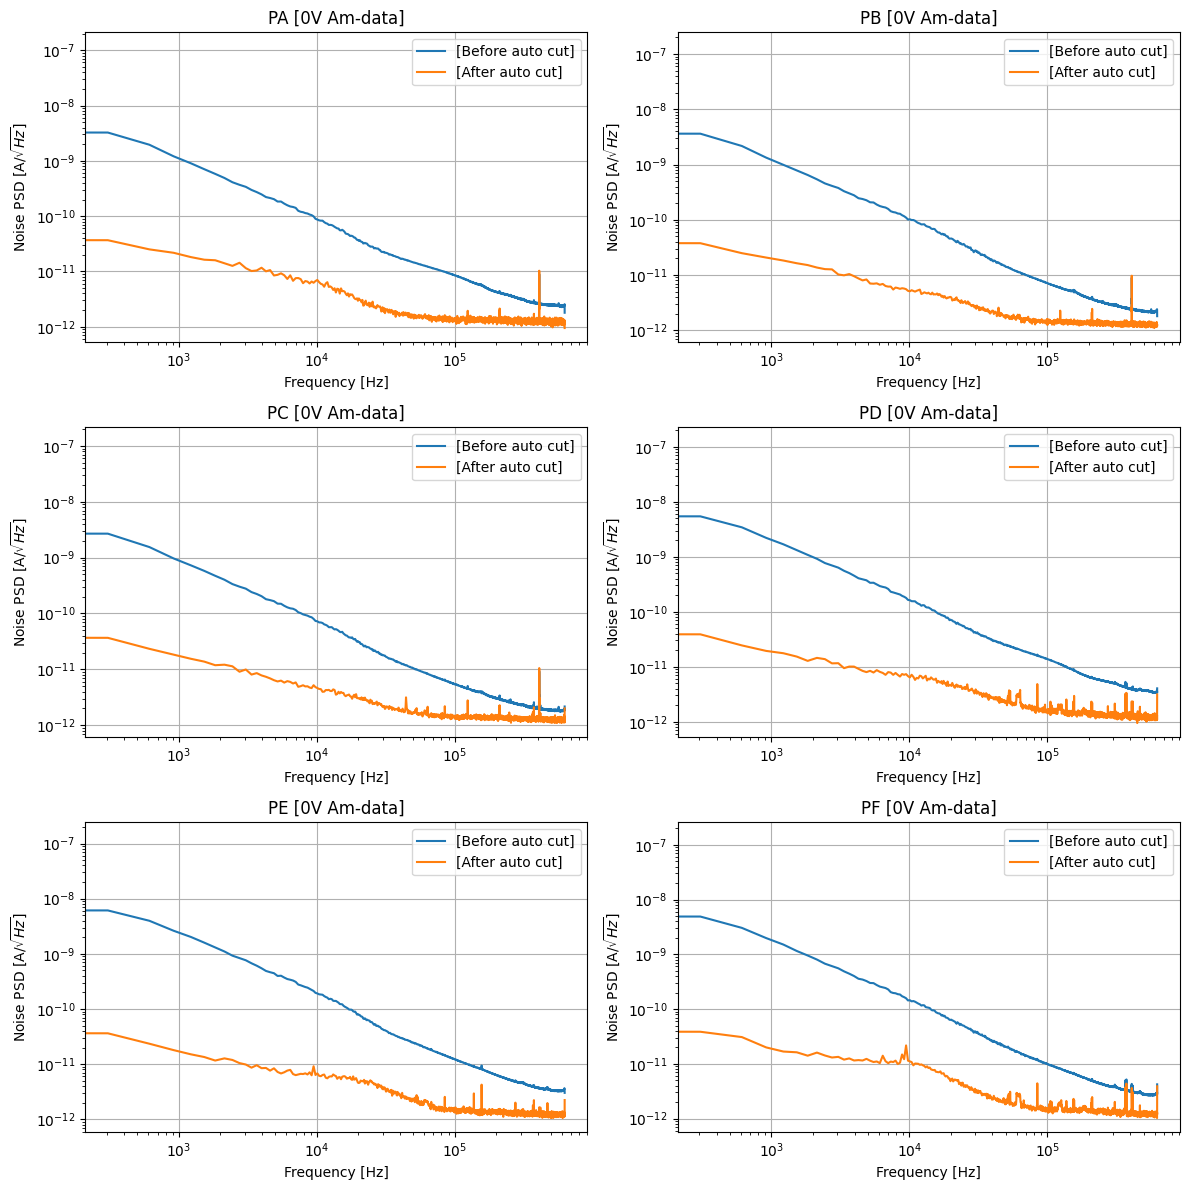

In [10]:
fig, axs = plt.subplots(3, 2, figsize=(12,12))
pp=[(0,0), (0,1), (1,0), (1,1),(2,0),(2,1)]
for i,chan in enumerate(channels):
#     if(i > 3):
#         break
    axs[pp[i]].loglog(noise_psd_nocut[chan][0],np.sqrt(noise_psd_nocut[chan][1]),label='[Before auto cut]')
    axs[pp[i]].loglog(noise_psd_cut[chan][0],np.sqrt(noise_psd_cut[chan][1]),label='[After auto cut]')
    axs[pp[i]].legend(loc='upper right')
    #axs[pp[i]].title('PC [0V Am-data]')
    axs[pp[i]].grid()
    #axs[pp[i]].set_ylim([1e-12,1e-10])
    axs[pp[i]].set_title(chan+' [0V Am-data]')
    axs[pp[i]].set_xlabel('Frequency [Hz]')
    axs[pp[i]].set_ylabel('Noise PSD [A/$\sqrt{Hz}$]')
fig.tight_layout()

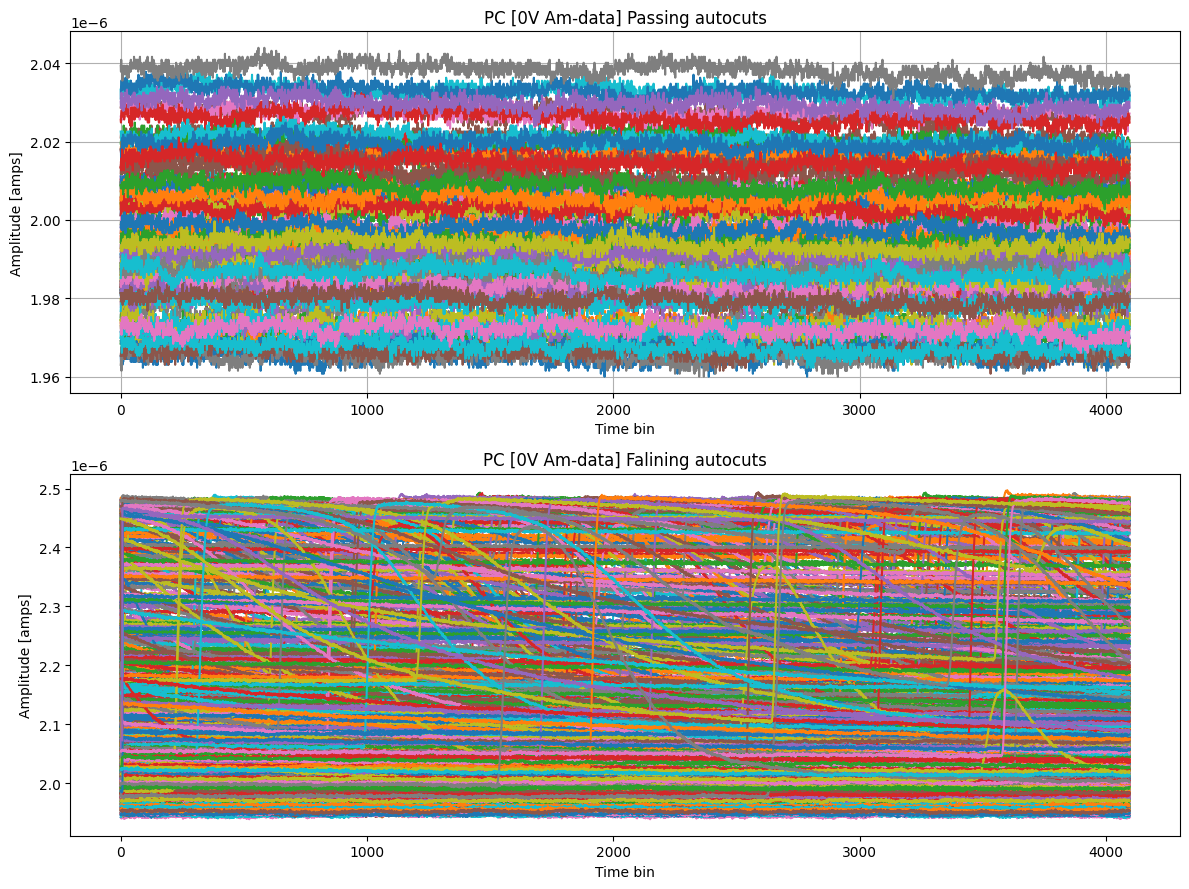

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(12,9))
pp=[(0,0), (0,1)]
eid = 0
#eid = 15000
chan = 'PC'
for trace in tracesAmps[chan][cut[chan]]:
    axs[0].plot(trace)

#axs[0].legend(loc='upper right')
#axs[pp[i]].title('PC [0V Am-data]')
axs[0].grid()
#axs[pp[i]].set_ylim([1e-12,1e-10])
axs[0].set_title(chan+' [0V Am-data] Passing autocuts')
axs[0].set_xlabel('Time bin')
axs[0].set_ylabel('Amplitude [amps]')

for trace in tracesAmps[chan][~cut[chan]]:
    axs[1].plot(trace)

axs[1].set_title(chan+' [0V Am-data] Falining autocuts')
axs[1].set_xlabel('Time bin')
axs[1].set_ylabel('Amplitude [amps]')

fig.tight_layout()

In [ ]:
trace_median = 0 #np.median(traces[chan].iloc[eid][10:500])
    traceAmp = traces[chan].iloc[eid]/(scale*DG)

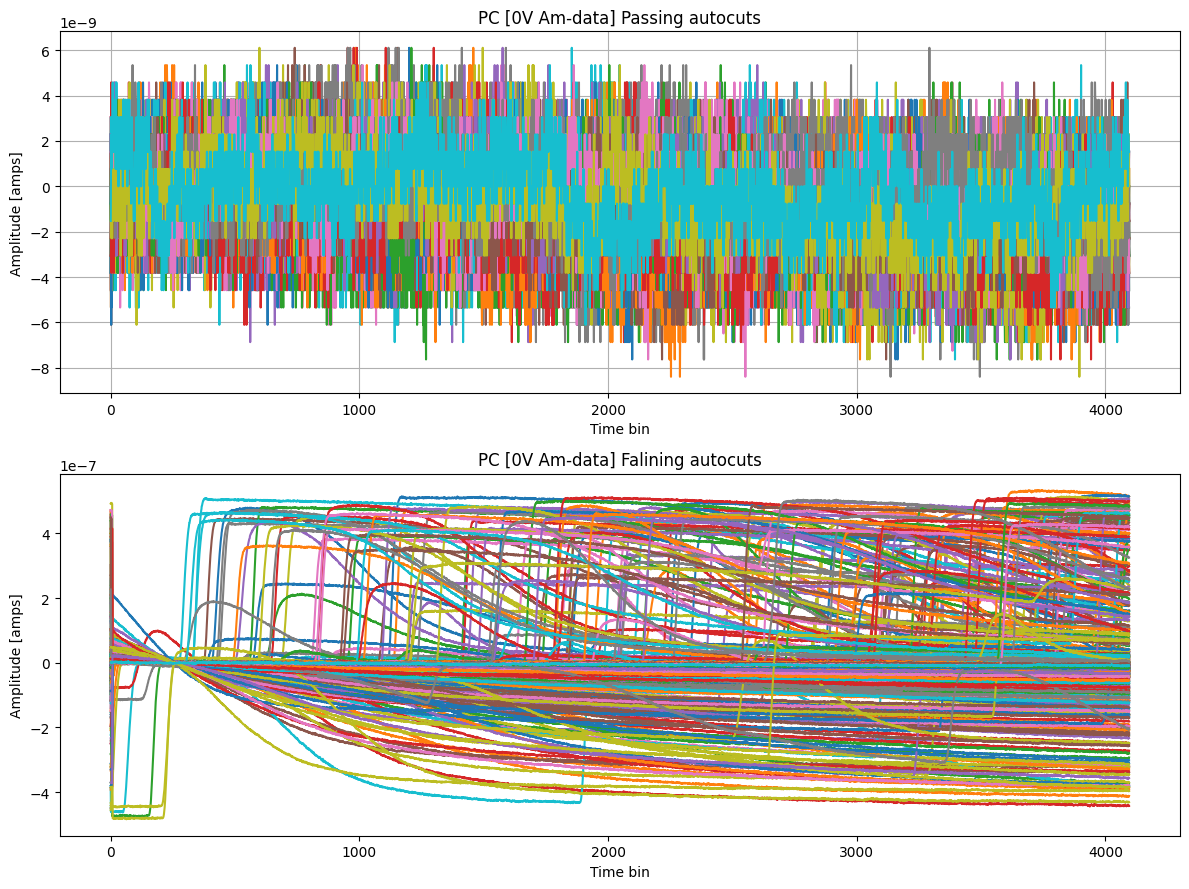

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(12,9))
pp=[(0,0), (0,1)]
eid = 0
#eid = 15000
chan = 'PC'
for trace in tracesAmps[chan][cut[chan]]:
    med_ = np.median(trace[10:500])
    axs[0].plot(trace - med_)

#axs[0].legend(loc='upper right')
#axs[pp[i]].title('PC [0V Am-data]')
axs[0].grid()
#axs[pp[i]].set_ylim([1e-12,1e-10])
axs[0].set_title(chan+' [0V Am-data] Passing autocuts')
axs[0].set_xlabel('Time bin')
axs[0].set_ylabel('Amplitude [amps]')

for trace in tracesAmps[chan][~cut[chan]]:
    med_ = np.median(trace[10:500])
    axs[1].plot(trace - med_)

axs[1].set_title(chan+' [0V Am-data] Falining autocuts')
axs[1].set_xlabel('Time bin')
axs[1].set_ylabel('Amplitude [amps]')

fig.tight_layout()

In [58]:
cut = qp.autocuts(
    traceArray,
    fs = fs
)
print('Cut efficieny is %0.3f'%(np.sum(cut)/len(traceArray)))

Cut efficieny is 0.110


In [60]:
psd_cut = qp.calc_psd(traceArray[cut], fs=fs, folded_over=True)

<>:10: DeprecationWarning: invalid escape sequence \s
<>:10: DeprecationWarning: invalid escape sequence \s
/tmp/ipykernel_1178987/2562002236.py:10: DeprecationWarning: invalid escape sequence \s
  plt.ylabel('Noise PSD [A/$\sqrt{Hz}$]')


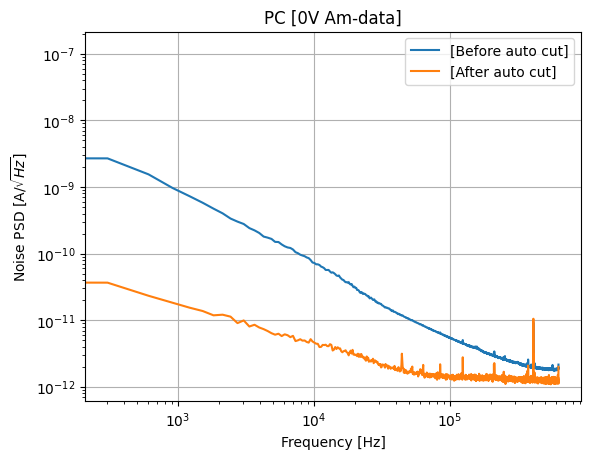

In [63]:
plt.loglog(noise_PSDs[0],np.sqrt(noise_PSDs[1]),label='[Before auto cut]')
plt.loglog(psd_cut[0],np.sqrt(psd_cut[1]),label='[After auto cut]')
#plt.legend(ncol=3, loc='upper left', fontsize=25)
plt.legend(loc='upper right')
plt.title('PC [0V Am-data]')
#plt.title("S101 All Channels, 0V", x=0.4, y=0.7, fontsize = 40)
plt.grid()
#plt.ylim([3e-12,3e-9])
plt.xlabel('Frequency [Hz]')
plt.ylabel('Noise PSD [A/$\sqrt{Hz}$]')
#plt.savefig('Plots/CUTE_R24_series_20April22_21April22_Z5_NoisePSDs_Ba_0V_'+chan+'.png')
#plt.savefig('Plots/CUTE_R24_series_20April22_21April22_Z5_NoisePSDs_Ba_0V_AllChannels.png')
plt.show()